In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns

In [2]:
print(tf.__version__)

2.5.0


In [3]:
data=pd.read_csv(r"C:\Users\User\Downloads\rainfall in india 1901-2015.csv")
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [4]:
groups = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
am=groups.get_group(('ASSAM & MEGHALAYA'))
am.head()

C:\Users\User\anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
207,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2
208,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3
209,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3
210,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5
211,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8


In [5]:
am=am.melt(['YEAR']).reset_index()
am.head()

,index,YEAR,variable,value
0,0,1901,JAN,27.1
1,1,1902,JAN,9.3
2,2,1903,JAN,19.9
3,3,1904,JAN,11.1
4,4,1905,JAN,19.9


In [6]:
dfam= am[['YEAR','variable','value']].sort_values(by=['YEAR'])
dfam.head()

,YEAR,variable,value
0,1901,JAN,27.1
575,1901,JUN,524.9
345,1901,APR,223.0
690,1901,JUL,430.6
805,1901,AUG,464.1


In [7]:
dfam.columns=['YEAR','Month','avg_rainfall']
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
dfam['Month']=dfam['Month'].map(d)
dfam.head(12)

,YEAR,Month,avg_rainfall
0,1901,1,27.1
575,1901,6,524.9
345,1901,4,223.0
690,1901,7,430.6
805,1901,8,464.1
230,1901,3,30.6
1265,1901,12,1.2
920,1901,9,291.4
115,1901,2,19.5
1035,1901,10,163.7


In [8]:
dfam['Date']=pd.to_datetime(dfam.assign(Day=1).loc[:,['YEAR','Month','Day']])
dfam.sort_values(by=['Date'], inplace=True, ascending=True)
dfam.head(12)

,YEAR,Month,avg_rainfall,Date
0,1901,1,27.1,1901-01-01
115,1901,2,19.5,1901-02-01
230,1901,3,30.6,1901-03-01
345,1901,4,223.0,1901-04-01
460,1901,5,207.0,1901-05-01
575,1901,6,524.9,1901-06-01
690,1901,7,430.6,1901-07-01
805,1901,8,464.1,1901-08-01
920,1901,9,291.4,1901-09-01
1035,1901,10,163.7,1901-10-01


In [9]:
#Outlier detection
up_b = dfam['avg_rainfall'].mean() + 2*dfam['avg_rainfall'].std()
low_b = dfam['avg_rainfall'].mean() - 2*dfam['avg_rainfall'].std()
# Replace outlier by interpolation 
dfam.loc[dfam['avg_rainfall'] > up_b, 'avg_rainfall'] = np.nan
dfam.loc[dfam['avg_rainfall'] < low_b, 'avg_rainfall'] = np.nan
dfam['avg_rainfall'].interpolate(inplace=True)

In [10]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [11]:
series = np.asarray(dfam.avg_rainfall)
time = np.asarray(dfam.Date)
print(time,series)
print(len(time),len(series))

['1901-01-01T00:00:00.000000000' '1901-02-01T00:00:00.000000000'
 '1901-03-01T00:00:00.000000000' ... '2015-10-01T00:00:00.000000000'
 '2015-11-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'] [27.1 19.5 30.6 ... 62.6 14.  15.2]
1380 1380


In [12]:
#dfam = dfam.drop(['YEAR','Month'],1)
dfam.set_index(dfam['Date'],inplace=True)
dfam = dfam.drop(['Date'],1)
dfam

,YEAR,Month,avg_rainfall
Date,,,
1901-01-01,1901,1,27.1
1901-02-01,1901,2,19.5
1901-03-01,1901,3,30.6
1901-04-01,1901,4,223.0
1901-05-01,1901,5,207.0
...,...,...,...
2015-08-01,2015,8,590.9
2015-09-01,2015,9,279.9
2015-10-01,2015,10,62.6


In [15]:
dfam = dfam.drop(['YEAR','Month'],1)
dfam

,avg_rainfall
Date,
1901-01-01,27.1
1901-02-01,19.5
1901-03-01,30.6
1901-04-01,223.0
1901-05-01,207.0
...,...
2015-08-01,590.9
2015-09-01,279.9
2015-10-01,62.6


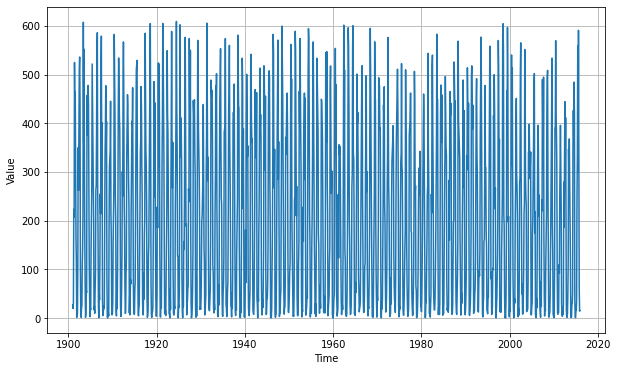

In [13]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfam)
df = scaler.transform(dfam)

In [19]:
split_time = 1308
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [21]:
print(time_train,x_valid.shape,series.shape)

['1901-01-01T00:00:00.000000000' '1901-02-01T00:00:00.000000000'
 '1901-03-01T00:00:00.000000000' ... '2009-10-01T00:00:00.000000000'
 '2009-11-01T00:00:00.000000000' '2009-12-01T00:00:00.000000000'] (72,) (1380,)


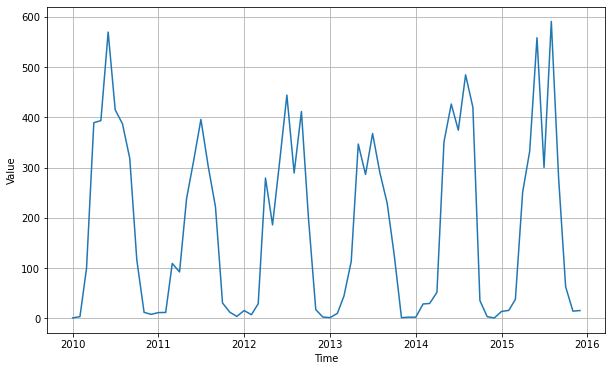

In [22]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)

In [18]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [19]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(64).prefetch(1)
    forecast = model.predict(ds)
    return scaler.inverse_transform(forecast.reshape(-1,1))

In [23]:
shuffle_buffer_size = 1000
window_size =60
batch_size = 64

In [21]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=64, shuffle_buffer=1000)

In [22]:
valid_set = windowed_dataset(x_valid, window_size=60, batch_size=64, shuffle_buffer=1000)

In [23]:
# # Let's rerun the model with the optimul learning rate
# tf.keras.backend.clear_session()
# tf.random.set_seed(42)
# np.random.seed(42)

# shuffle_buffer_size = 1000
# window_size =60
# batch_size = 64

# train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# loss = tf.keras.losses.Huber()

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv1D(filters=32, kernel_size=5,
#                           strides=1, padding='causal',
#                           activation='relu',
#                           input_shape=[None, 1]),
#     tf.keras.layers.LSTM(128, return_sequences=True),
#     tf.keras.layers.LSTM(64, return_sequences=True),
#     tf.keras.layers.Dense(32, activation="tanh"),
#     tf.keras.layers.Dense(16, activation="tanh"),
#     tf.keras.layers.Dense(1)
# ])


# model.compile(loss=loss, optimizer='adam', metrics=['mae'])

# history = model.fit(train_set, epochs=500)

In [53]:
model = tf.keras.models.load_model(r'C:\Users\User\Desktop\Projects')


KeyboardInterrupt: 

In [25]:
# history = model.fit(train_set, epochs=1000)

First 12 Predictions : 
 [ 36.092228  15.055382  65.035965 103.63809  403.99503  406.39297
 505.37192  509.43893  200.29372  171.43365   27.962149  11.512378]

mae :  200.1996


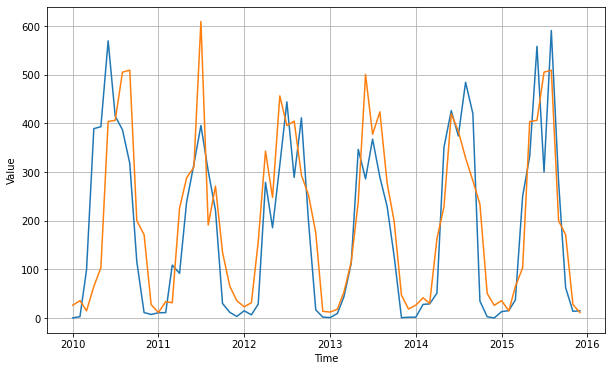

In [26]:
ser = series_transformed[:, np.newaxis]
rnn_forecast = model_forecast(model, ser , window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, 0]
print("First 12 Predictions :","\n",rnn_forecast[-12:])
print('')
print("mae : ", tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast[-72:]).numpy().mean())

plt.figure(figsize=(10, 6))
plot_series(time_valid, scaler.inverse_transform(x_valid.reshape(-1,1)))
plot_series(time_valid, rnn_forecast[-72:])

In [27]:
# model.save(r'C:\Users\User\Desktop\Projects')

In [62]:
add_dates = [dfam.index[-1] + pd.tseries.offsets.DateOffset(months=x) for x in range(0,61) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=dfam.columns)

In [69]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])
df_proj = pd.concat([dfam,df_predict], axis=1)

In [70]:
df_predict

,Prediction
2016-01-01,12.858317
2016-02-01,23.760350
2016-03-01,57.813500
2016-04-01,142.823871
2016-05-01,279.949362
2016-06-01,400.650522
2016-07-01,423.529382
2016-08-01,377.795403
2016-09-01,306.882609
2016-10-01,179.213793


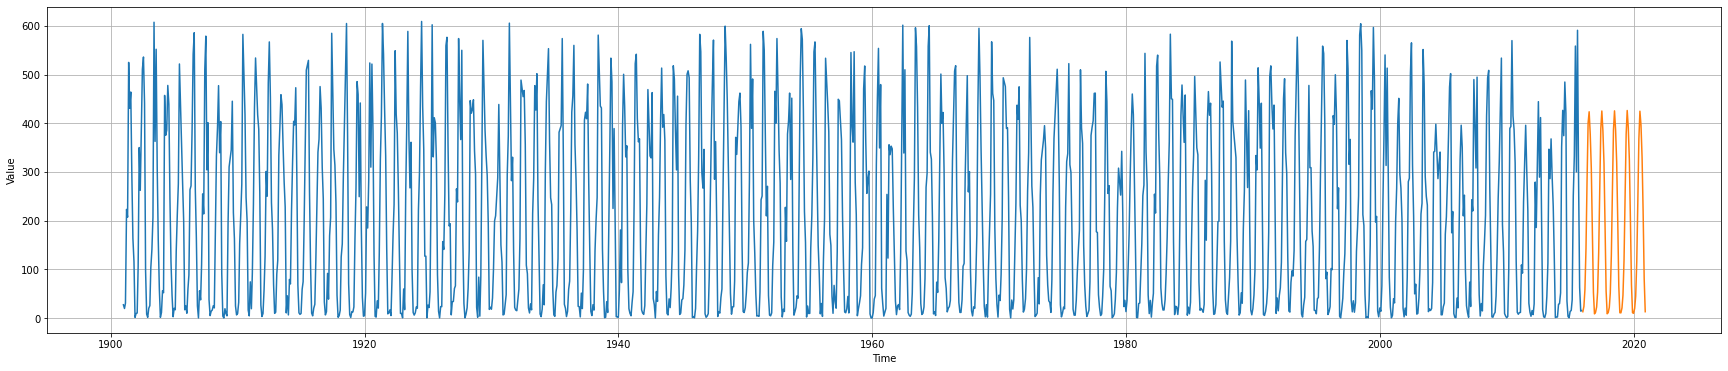

In [71]:
plt.figure(figsize=(30,6))
plot_series(time, series)
plot_series(df_predict.index,df_predict)